In [44]:
#import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import numpy as np
%matplotlib inline

In [2]:
#load the raw csv files
df_arabica=pd.read_csv('arabica_ratings_raw.csv',index_col=[0])
df_robusta=pd.read_csv('robusta_ratings_raw.csv',index_col=[0])

In [3]:
#lets see the top 5 rows of the dataset
df_arabica.head()

,quality_score,view_certificate_1,view_certificate_2,Cupping Protocol and Descriptors,View Green Analysis Details,Request a Sample,Species,Owner,Country of Origin,Farm Name,...,Quakers,Color,Category Two Defects,NA.3,Expiration,Certification Body,Certification Address,Certification Contact,Unnamed: 51,Notes
0,90.58,NaN,NaN,NaN,NaN,NaN,Arabica,metad plc,Ethiopia,METAD PLC,...,0.0,Green,0 full defects,NaN,"April 3rd, 2016",METAD Agricultural Development plc,"BAWA Center, 3rd Floor (Gerji), Addis Ababa, E...","Aman Adinew (Emebet Dinku) - +251-116-292534, ...",NaN,NaN
1,89.92,NaN,NaN,NaN,NaN,NaN,Arabica,metad plc,Ethiopia,METAD PLC,...,0.0,Green,1 full defects,NaN,"April 3rd, 2016",METAD Agricultural Development plc,"BAWA Center, 3rd Floor (Gerji), Addis Ababa, E...","Aman Adinew (Emebet Dinku) - +251-116-292534, ...",NaN,NaN
2,89.75,NaN,NaN,NaN,NaN,NaN,Arabica,Grounds for Health Admin,Guatemala,"San Marcos Barrancas ""San Cristobal Cuch",...,0.0,NaN,0 full defects,NaN,"May 31st, 2011",Specialty Coffee Association,"117 W 4th St, Suite 300 Santa Ana, CA 92701",Chris Buck - (562) 624-4100,NaN,NaN
3,89.00,NaN,NaN,NaN,NaN,NaN,Arabica,Yidnekachew Dabessa,Ethiopia,Yidnekachew Dabessa Coffee Plantation,...,0.0,Green,2 full defects,NaN,"March 25th, 2016",METAD Agricultural Development plc,"BAWA Center, 3rd Floor (Gerji), Addis Ababa, E...","Aman Adinew (Emebet Dinku) - +251-116-292534, ...",NaN,NaN
4,88.83,NaN,NaN,NaN,NaN,NaN,Arabica,metad plc,Ethiopia,METAD PLC,...,0.0,Green,2 full defects,NaN,"April 3rd, 2016",METAD Agricultural Development plc,"BAWA Center, 3rd Floor (Gerji), Addis Ababa, E...","Aman Adinew (Emebet Dinku) - +251-116-292534, ...",NaN,NaN


### Well it looks pretty messy and a lot of cleaning has to be done. We can see many null values in few columns

In [4]:
print(df_arabica.shape,df_robusta.shape)

(1312, 52) (28, 50)


### There are 1312 records in Arabica dataset and 28 records in Robusta.We can see that it is a highly imbalanced dataset. Let's first deal with missing values

In [5]:
df_arabica.isnull().sum()

quality_score                          0
view_certificate_1                  1312
view_certificate_2                  1312
Cupping Protocol and Descriptors    1312
View Green Analysis Details         1312
Request a Sample                    1312
Species                                0
Owner                                  7
Country of Origin                      1
Farm Name                            356
Lot Number                          1042
Mill                                 307
ICO Number                           146
Company                              210
Altitude                             218
Region                                56
Producer                             230
Number of Bags                         0
Bag Weight                             0
In-Country Partner                     0
Harvest Year                          47
Grading Date                           0
Owner.1                                7
Variety                              202
Status          

### We can remove the columns view_certificate_1,view_certificate_2,Cupping Protocol and Descriptors,View Green Analysis Details,Lot Number,NA.2, NA.3, Unnamed: 51 and Notes columns first as there are many null values       

In [6]:
df_arabica.drop(['view_certificate_1','view_certificate_2','Cupping Protocol and Descriptors','View Green Analysis Details'
                ,'Request a Sample','NA.2','NA.3','Unnamed: 51','Notes'],axis = 1, inplace = True)

<AxesSubplot:>

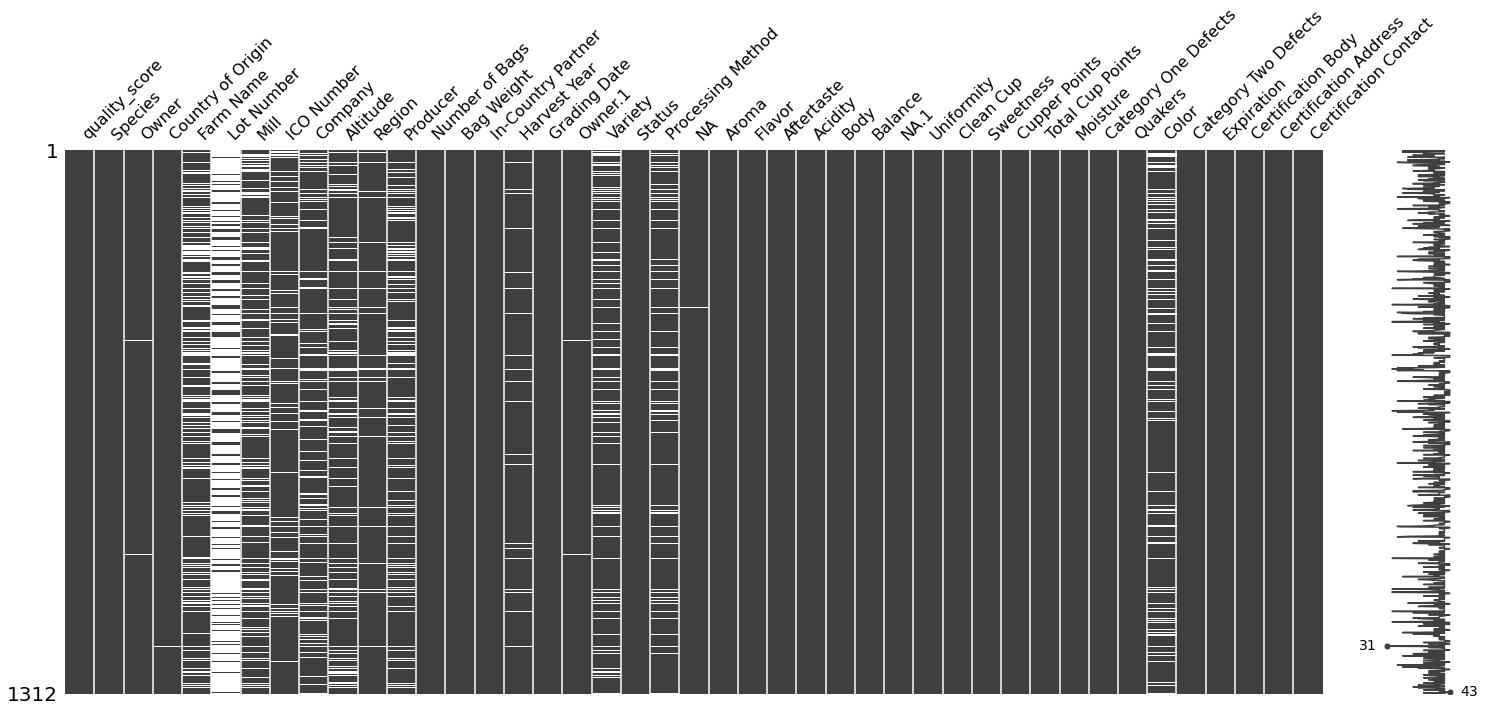

In [7]:
#Visualise the remaining columns in arabica dataset.
msno.matrix(df_arabica)

### We can see that Lot Number still has a lot of missing values.So let's remove it. 

In [8]:
#Drop the Lot Number from arabica dataset
df_arabica.drop(['Lot Number'],axis=1,inplace=True)

In [9]:
#explore NA and NA.1 columns as we have to give a proper name and also check its contents
print(df_arabica.NA.value_counts())
print(df_arabica['NA.1'].value_counts())

Sample    1310
Name: NA, dtype: int64
Sample    1312
Name: NA.1, dtype: int64


### We can safely remove these columns as they don't add value to our dataset

In [10]:
#drop the NA and NA.1 columns from the dataset
df_arabica.drop(['NA','NA.1'],axis=1,inplace=True)

### I am assuming Expiration,Certification Body,Certification Address,Certification Contact don't add value to our classifcation or clustering model in our furter steps as they don't go with our problem setting of coffee selection

In [11]:
#drop the Expiration,Certification Body,Certification Address,Certification Contact columns from arabica dataset
df_arabica.drop(['Expiration','Certification Body','Certification Address','Certification Contact'],axis=1,inplace=True)

In [12]:
#check owner and owner.1 columns to remove duplicates
print(df_arabica['Owner'].value_counts())
print('----------------------------------------------------')
print(df_arabica['Owner.1'].value_counts())

Juan Luis Alvarado Romero           155
Racafe & Cia S.C.A                   60
Exportadora de Cafe Condor S.A       54
Kona Pacific Farmers Cooperative     52
Ipanema Coffees                      50
                                   ... 
Finca Estate                          1
Philip Schluter                       1
George A. Fernandez                   1
Wayner Jimenez                        1
Star Cafe Ltd                         1
Name: Owner, Length: 307, dtype: int64
----------------------------------------------------
Juan Luis Alvarado Romero           155
Racafe & Cia S.C.A                   60
Exportadora de Cafe Condor S.A       54
Kona Pacific Farmers Cooperative     52
Ipanema Coffees                      50
                                   ... 
Finca Estate                          1
Philip Schluter                       1
George A. Fernandez                   1
Wayner Jimenez                        1
Star Cafe Ltd                         1
Name: Owner.1, Length: 309, 

In [13]:
#Remove owner.1 column from the arabica dataset
df_arabica.drop(['Owner.1'],axis=1,inplace=True)

### Going with these many features is not a good idea for building a classification model but I don't want to remove columns based only on my intuition. I would like to perform few statistical tests to understand and select the best features

In [16]:
df_arabica.isnull().sum()

quality_score             0
Species                   0
Owner                     7
Country of Origin         1
Farm Name               356
Mill                    307
ICO Number              146
Company                 210
Altitude                218
Region                   56
Producer                230
Number of Bags            0
Bag Weight                0
In-Country Partner        0
Harvest Year             47
Grading Date              0
Variety                 202
Status                    0
Processing Method       153
Aroma                     0
Flavor                    0
Aftertaste                0
Acidity                   0
Body                      0
Balance                   0
Uniformity                0
Clean Cup                 0
Sweetness                 0
Cupper Points             0
Total Cup Points          0
Moisture                  0
Category One Defects      0
Quakers                   1
Color                   217
Category Two Defects      0
dtype: int64

### Impute Owner column of Arabica dataset

In [20]:
df_arabica[df_arabica.Owner.isnull()]

,quality_score,Species,Owner,Country of Origin,Farm Name,Mill,ICO Number,Company,Altitude,Region,...,Uniformity,Clean Cup,Sweetness,Cupper Points,Total Cup Points,Moisture,Category One Defects,Quakers,Color,Category Two Defects
364,83.50,Arabica,NaN,Honduras,Los Hicaques,CIGRAH SPS,13-111-240,CIGRAH,1350,Comayagua,...,10.0,10.0,10.0,7.83,Sample 83.50,10 %,0 full defects,0.0,Green,3 full defects
459,83.17,Arabica,NaN,Honduras,Los Hicaques,CIGRAH SPS,13-111-193,CIGRAH,1350,Comayagua,...,10.0,10.0,10.0,7.50,Sample 83.17,11 %,0 full defects,0.0,Green,3 full defects
602,82.75,Arabica,NaN,Colombia,Supply Chain ECOM CCA S.A.,South Huila,3-79-0334,ECOM CCA S.A.,1400 thru 1850,South huila,...,10.0,10.0,10.0,7.50,Sample 82.75,0 %,0 full defects,0.0,Blue-Green,0 full defects
848,81.83,Arabica,NaN,Honduras,Gran Manzana y el Aguacate,CIGRAH SPS,13-111-311,CIGRAH,1350,Comayagua,...,10.0,10.0,10.0,7.50,Sample 81.83,10 %,0 full defects,0.0,Green,4 full defects
882,81.67,Arabica,NaN,Honduras,Gran Manzana y el Aguacate,CIGRAH SPS,13-111-192,CIGRAH,1400,Comayagua,...,10.0,10.0,10.0,7.50,Sample 81.67,10 %,0 full defects,0.0,Green,5 full defects
975,81.17,Arabica,NaN,Honduras,Los Hicaques,CIGRAH,13-111-037,CIGRAH,1450 mals,Central Region,...,10.0,10.0,10.0,7.33,Sample 81.17,13 %,0 full defects,0.0,Green,1 full defects
1044,80.75,Arabica,NaN,Honduras,Los Hicaques,CIGRAH,13-111-035,CIGRAH,1450 mals,Central Region,...,10.0,10.0,10.0,7.00,Sample 80.75,13 %,0 full defects,0.0,Green,1 full defects


In [34]:
df_arabica[(df_arabica['Country of Origin']=='Honduras') & (df_arabica['Farm Name']=='Los Hicaques')
          ]

,quality_score,Species,Owner,Country of Origin,Farm Name,Mill,ICO Number,Company,Altitude,Region,...,Uniformity,Clean Cup,Sweetness,Cupper Points,Total Cup Points,Moisture,Category One Defects,Quakers,Color,Category Two Defects
28,86.67,Arabica,Bismarck Castro,Honduras,Los Hicaques,CIGRAH S.A. DE C.V.,13-111-053,CIGRAH S.A DE C.V,1400,Comayagua,...,10.0,10.0,10.0,8.25,Sample 86.67,10 %,0 full defects,0.0,Green,3 full defects
182,84.33,Arabica,Bismarck Castro,Honduras,Los Hicaques,Dry Mill,13-111-032,CIGRAH S.A DE C.V,1500,Central Region,...,10.0,10.0,10.0,7.83,Sample 84.33,11 %,0 full defects,1.0,Green,2 full defects
316,83.67,Arabica,Bismarck Castro,Honduras,Los Hicaques,CIGRAH S.A. DE C.V.,13 / 111 / 053,CIGRAH S.A DE C.V,1400,Comayagua,...,10.0,10.0,10.0,7.33,Sample 83.67,10 %,0 full defects,0.0,Green,2 full defects
364,83.50,Arabica,NaN,Honduras,Los Hicaques,CIGRAH SPS,13-111-240,CIGRAH,1350,Comayagua,...,10.0,10.0,10.0,7.83,Sample 83.50,10 %,0 full defects,0.0,Green,3 full defects
459,83.17,Arabica,NaN,Honduras,Los Hicaques,CIGRAH SPS,13-111-193,CIGRAH,1350,Comayagua,...,10.0,10.0,10.0,7.50,Sample 83.17,11 %,0 full defects,0.0,Green,3 full defects
588,82.75,Arabica,Bismarck Castro,Honduras,Los Hicaques,CIGRAH S.A. DE C.V.,13-111-053,CIGRAH S.A DE C.V,1400,Comayagua,...,10.0,10.0,10.0,7.67,Sample 82.75,9 %,0 full defects,1.0,Green,6 full defects
705,82.33,Arabica,Bismarck Castro,Honduras,Los Hicaques,CIGRAH S.A. DE .V.,13-111-022,CIGRAH S.A DE C.V,1396,Comayagua,...,10.0,10.0,10.0,7.58,Sample 82.33,10 %,0 full defects,1.0,Green,8 full defects
817,81.92,Arabica,Bismarck Castro,Honduras,Los Hicaques,CIGRAH S.A. DE C.V.,13-111-022,CIGRAH S.A DE C.V,1400,Comayagua,...,10.0,10.0,10.0,7.33,Sample 81.92,12 %,0 full defects,0.0,Green,1 full defects
975,81.17,Arabica,NaN,Honduras,Los Hicaques,CIGRAH,13-111-037,CIGRAH,1450 mals,Central Region,...,10.0,10.0,10.0,7.33,Sample 81.17,13 %,0 full defects,0.0,Green,1 full defects
1044,80.75,Arabica,NaN,Honduras,Los Hicaques,CIGRAH,13-111-035,CIGRAH,1450 mals,Central Region,...,10.0,10.0,10.0,7.00,Sample 80.75,13 %,0 full defects,0.0,Green,1 full defects


### As the majortiy of the Owners are Bismark Castro for Farm name-Los Hicaques and country of origin-Honduras, let us replace the null values with Bismark Castro. 

In [37]:
#check number of missing values in Owner column before imputing.
df_arabica['Owner'].isnull().sum()

7

In [38]:
#impute the null values with Bismark Castro as discussed earlier
df_arabica['Owner']=df_arabica['Owner'].fillna('Bismarck Castro')

In [39]:
#check it the Owner column is successfully imputed
df_arabica['Owner'].isnull().sum()

0

### Impute Country of Origin column of Arabica dataset

In [40]:
df_arabica[df_arabica['Country of Origin'].isnull()]

,quality_score,Species,Owner,Country of Origin,Farm Name,Mill,ICO Number,Company,Altitude,Region,...,Uniformity,Clean Cup,Sweetness,Cupper Points,Total Cup Points,Moisture,Category One Defects,Quakers,Color,Category Two Defects
1197,79.08,Arabica,Racafe & Cia S.C.A,NaN,NaN,NaN,3-37-1980,NaN,NaN,NaN,...,10.0,10.0,10.0,7.25,Sample 79.08,10 %,0 full defects,0.0,NaN,3 full defects


In [41]:
df_arabica[df_arabica['Owner']=='Racafe & Cia S.C.A']

,quality_score,Species,Owner,Country of Origin,Farm Name,Mill,ICO Number,Company,Altitude,Region,...,Uniformity,Clean Cup,Sweetness,Cupper Points,Total Cup Points,Moisture,Category One Defects,Quakers,Color,Category Two Defects
97,85.00,Arabica,Racafe & Cia S.C.A,Colombia,NaN,Bachue,3-37-1829,Racafe & Cia S.C.A,NaN,Huila,...,10.0,10.0,10.0,7.83,Sample 85.00,0 %,0 full defects,0.0,Green,3 full defects
106,84.92,Arabica,Racafe & Cia S.C.A,Colombia,NaN,Bachue,3-37-0277,Racafe & Cia S.C.A,NaN,Huila,...,10.0,10.0,10.0,7.83,Sample 84.92,0 %,1 full defects,6.0,NaN,2 full defects
107,84.92,Arabica,Racafe & Cia S.C.A,Colombia,NaN,NaN,3-37-4824,Racafe & Cia S.C.A,De 1600 a 1950 msnm,Huila,...,10.0,10.0,10.0,7.83,Sample 84.92,12 %,0 full defects,0.0,Green,1 full defects
110,84.92,Arabica,Racafe & Cia S.C.A,Colombia,NaN,NaN,3-37-0416,Racafe & Cia S.C.A,De 1600 a 1950 msnm,HUILA,...,10.0,10.0,10.0,7.92,Sample 84.92,11 %,0 full defects,0.0,Green,3 full defects
145,84.58,Arabica,Racafe & Cia S.C.A,Colombia,NaN,Bucaramanga,3-37-1724,Racafe & Cia S.C.A,1500,Santander,...,10.0,10.0,10.0,8.08,Sample 84.58,0 %,0 full defects,0.0,Blue-Green,4 full defects
146,84.58,Arabica,Racafe & Cia S.C.A,Colombia,NaN,Bachue,3-37-1291,Racafe & Cia S.C.A,NaN,Huila,...,10.0,10.0,10.0,7.75,Sample 84.58,0 %,0 full defects,1.0,Green,5 full defects
151,84.58,Arabica,Racafe & Cia S.C.A,Colombia,NaN,NaN,3-37-0930,Racafe & Cia S.C.A,1600 a 1900 msnm,Huila,...,10.0,10.0,10.0,7.92,Sample 84.58,0 %,0 full defects,0.0,NaN,5 full defects
174,84.42,Arabica,Racafe & Cia S.C.A,Colombia,NaN,NaN,3-37-2940,Racafe & Cia S.C.A,De 1600 a 1950 msnm,Huila,...,10.0,10.0,10.0,7.75,Sample 84.42,0 %,0 full defects,0.0,Green,3 full defects
183,84.33,Arabica,Racafe & Cia S.C.A,Colombia,NaN,Bogota - Bachue,3-37-1704,Racafe & Cia S.C.A,NaN,La Plata,...,10.0,10.0,10.0,7.83,Sample 84.33,0 %,0 full defects,2.0,NaN,4 full defects
197,84.25,Arabica,Racafe & Cia S.C.A,Colombia,NaN,NaN,3-37-0637,Racafe & Cia S.C.A,De 1600 a 1950 msnm,Huila,...,10.0,10.0,10.0,7.83,Sample 84.25,11 %,0 full defects,0.0,Green,3 full defects


In [43]:
def one_hot_encoding_top_x(df, variable, top_x_labels):
    # function to create the dummy variables for the most frequent labels
    # we can vary the number of most frequent labels that we encode
    
    for label in top_x_labels:
        df[variable+'_'+label] = np.where(df[variable]==label, 1, 0)

In [45]:
# let's make a list with the most frequent categories of the variable

top_10_labels = [y for y in df_arabica.Owner.value_counts().sort_values(ascending=False).head(10).index]
top_10_labels

['Juan Luis Alvarado Romero',
 'Racafe & Cia S.C.A',
 'Exportadora de Cafe Condor S.A',
 'Kona Pacific Farmers Cooperative',
 'Ipanema Coffees',
 'CQI Taiwan ICP CQI台灣合作夥伴',
 'Lin, Che-Hao Krude 林哲豪',
 'NUCOFFEE',
 'CARCAFE LTDA CI',
 'The Coffee Source Inc.']

In [47]:
one_hot_encoding_top_x(df_arabica, 'Owner', top_10_labels)
df_arabica.head()

,quality_score,Species,Owner,Country of Origin,Farm Name,Mill,ICO Number,Company,Altitude,Region,...,Owner_Juan Luis Alvarado Romero,Owner_Racafe & Cia S.C.A,Owner_Exportadora de Cafe Condor S.A,Owner_Kona Pacific Farmers Cooperative,Owner_Ipanema Coffees,Owner_CQI Taiwan ICP CQI台灣合作夥伴,"Owner_Lin, Che-Hao Krude 林哲豪",Owner_NUCOFFEE,Owner_CARCAFE LTDA CI,Owner_The Coffee Source Inc.
0,90.58,Arabica,metad plc,Ethiopia,METAD PLC,METAD PLC,2014/2015,METAD Agricultural Developmet plc,1950-2200,GUJI-HAMBELA/GOYO,...,0,0,0,0,0,0,0,0,0,0
1,89.92,Arabica,metad plc,Ethiopia,METAD PLC,METAD PLC,2014/2015,METAD Agricultural Developmet plc,1950-2200,GUJI-HAMBELA/ALAKA,...,0,0,0,0,0,0,0,0,0,0
2,89.75,Arabica,Grounds for Health Admin,Guatemala,"San Marcos Barrancas ""San Cristobal Cuch",NaN,NaN,NaN,1600 - 1800 m,NaN,...,0,0,0,0,0,0,0,0,0,0
3,89.00,Arabica,Yidnekachew Dabessa,Ethiopia,Yidnekachew Dabessa Coffee Plantation,Wolensu,NaN,Yidnekachew Debessa Coffee Plantation,1800-2200,Oromia,...,0,0,0,0,0,0,0,0,0,0
4,88.83,Arabica,metad plc,Ethiopia,METAD PLC,METAD PLC,2014/2015,METAD Agricultural Developmet plc,1950-2200,GUJI-HAMBELA/BISHAN FUGU,...,0,0,0,0,0,0,0,0,0,0


In [94]:

top_10_labels = [y for y in df_arabica['Country of Origin'].value_counts().sort_values(ascending=False).head(10).index]
top_10_labels

['Mexico',
 'Colombia',
 'Guatemala',
 'Brazil',
 'Taiwan',
 'United States (Hawaii)',
 'Honduras',
 'Costa Rica',
 'Ethiopia',
 'Tanzania, United Republic Of']

In [95]:
one_hot_encoding_top_x(df_arabica, 'Country of Origin', top_10_labels)
df_arabica.head()

,quality_score,Species,Owner,Country of Origin,Farm Name,Mill,ICO Number,Company,Altitude,Region,...,Country of Origin_Mexico,Country of Origin_Colombia,Country of Origin_Guatemala,Country of Origin_Brazil,Country of Origin_Taiwan,Country of Origin_United States (Hawaii),Country of Origin_Honduras,Country of Origin_Costa Rica,Country of Origin_Ethiopia,"Country of Origin_Tanzania, United Republic Of"
0,90.58,Arabica,metad plc,Ethiopia,METAD PLC,METAD PLC,2014/2015,METAD Agricultural Developmet plc,1950-2200,GUJI-HAMBELA/GOYO,...,0,0,0,0,0,0,0,0,1,0
1,89.92,Arabica,metad plc,Ethiopia,METAD PLC,METAD PLC,2014/2015,METAD Agricultural Developmet plc,1950-2200,GUJI-HAMBELA/ALAKA,...,0,0,0,0,0,0,0,0,1,0
2,89.75,Arabica,Grounds for Health Admin,Guatemala,"San Marcos Barrancas ""San Cristobal Cuch",NaN,NaN,NaN,1600 - 1800 m,NaN,...,0,0,1,0,0,0,0,0,0,0
3,89.00,Arabica,Yidnekachew Dabessa,Ethiopia,Yidnekachew Dabessa Coffee Plantation,Wolensu,NaN,Yidnekachew Debessa Coffee Plantation,1800-2200,Oromia,...,0,0,0,0,0,0,0,0,1,0
4,88.83,Arabica,metad plc,Ethiopia,METAD PLC,METAD PLC,2014/2015,METAD Agricultural Developmet plc,1950-2200,GUJI-HAMBELA/BISHAN FUGU,...,0,0,0,0,0,0,0,0,1,0


In [48]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [71]:
y = df_arabica['Species']
X = df_arabica.drop('Species', axis = 1)

In [72]:
X.drop(X.iloc[:, 1:10], inplace = True, axis = 1)

In [73]:
X.drop(X.iloc[:, 2:8], inplace = True, axis = 1)

In [74]:
X.drop(X.columns[[2, 13,14,15,17,18]], axis = 1, inplace = True)

In [75]:
X['Quakers'] = X['Quakers'].fillna(X['Quakers'].mode()[0])

In [77]:
y=np.ones(1312)

In [79]:
X.shape

(1312, 23)

In [61]:
X.isnull().sum()

quality_score                             0
Number of Bags                            0
Aroma                                     0
Flavor                                    0
Aftertaste                                0
Acidity                                   0
Body                                      0
Balance                                   0
Uniformity                                0
Clean Cup                                 0
Sweetness                                 0
Cupper Points                             0
Quakers                                   0
Owner_Juan Luis Alvarado Romero           0
Owner_Racafe & Cia S.C.A                  0
Owner_Exportadora de Cafe Condor S.A      0
Owner_Kona Pacific Farmers Cooperative    0
Owner_Ipanema Coffees                     0
Owner_CQI Taiwan ICP CQI台灣合作夥伴            0
Owner_Lin, Che-Hao Krude 林哲豪              0
Owner_NUCOFFEE                            0
Owner_CARCAFE LTDA CI                     0
Owner_The Coffee Source Inc.    

In [84]:
### Apply SelectKBest Algorithm
ordered_rank_features=SelectKBest(score_func=chi2,k=20)
ordered_feature=ordered_rank_features.fit(X,y)

In [85]:
dfscores=pd.DataFrame(ordered_feature.scores_,columns=["Score"])
dfcolumns=pd.DataFrame(X.columns)

In [86]:
features_rank=pd.concat([dfcolumns,dfscores],axis=1)

In [87]:
features_rank.columns=['Features','Score']
features_rank

,Features,Score
0,quality_score,NaN
1,Number of Bags,NaN
2,Aroma,NaN
3,Flavor,NaN
4,Aftertaste,NaN
5,Acidity,NaN
6,Body,NaN
7,Balance,NaN
8,Uniformity,NaN
9,Clean Cup,NaN


In [88]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model=ExtraTreesClassifier()
model.fit(X,y)


ExtraTreesClassifier()

In [89]:
print(model.feature_importances_)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [99]:
df_arabica['Altitude'].value_counts()

1100         43
1200         41
1300         32
1400         32
4300         31
             ..
800公尺         1
1700 msnm     1
1300 msnm     1
1.85          1
4287          1
Name: Altitude, Length: 407, dtype: int64

In [97]:
df_arabica.dtypes

quality_score                                     float64
Species                                            object
Owner                                              object
Country of Origin                                  object
Farm Name                                          object
Mill                                               object
ICO Number                                         object
Company                                            object
Altitude                                           object
Region                                             object
Producer                                           object
Number of Bags                                      int64
Bag Weight                                         object
In-Country Partner                                 object
Harvest Year                                       object
Grading Date                                       object
Variety                                            object
Status        

d:\anaconda_uj\envs\coffeeprediction\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 21488 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\anaconda_uj\envs\coffeeprediction\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 28771 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\anaconda_uj\envs\coffeeprediction\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 21512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\anaconda_uj\envs\coffeeprediction\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 20316 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\anaconda_uj\envs\coffeeprediction\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 22821 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\anaconda_uj\envs\coffeeprediction\lib\site-packages\matplotlib

<AxesSubplot:>

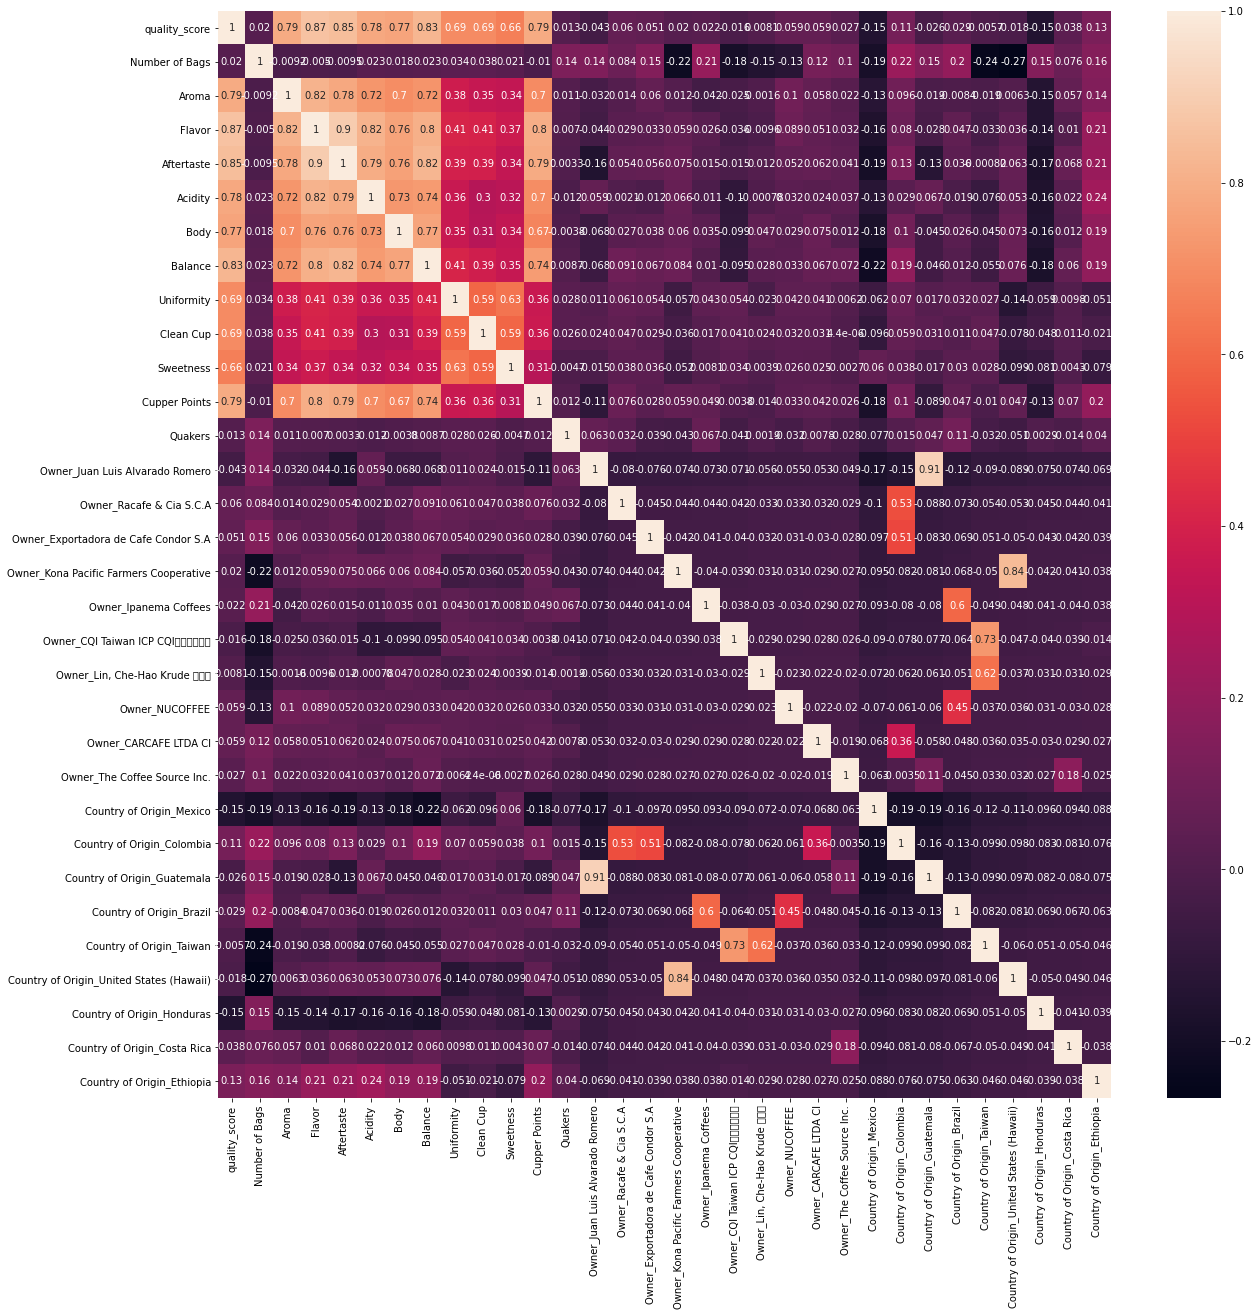

In [96]:
import seaborn as sns
corr=df_arabica.iloc[:,:-1].corr()
top_features=corr.index
plt.figure(figsize=(20,20))
sns.heatmap(df_arabica[top_features].corr(),annot=True)

d:\anaconda_uj\envs\coffeeprediction\lib\site-packages\seaborn\matrix.py:301: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
d:\anaconda_uj\envs\coffeeprediction\lib\site-packages\seaborn\matrix.py:301: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


<AxesSubplot:>

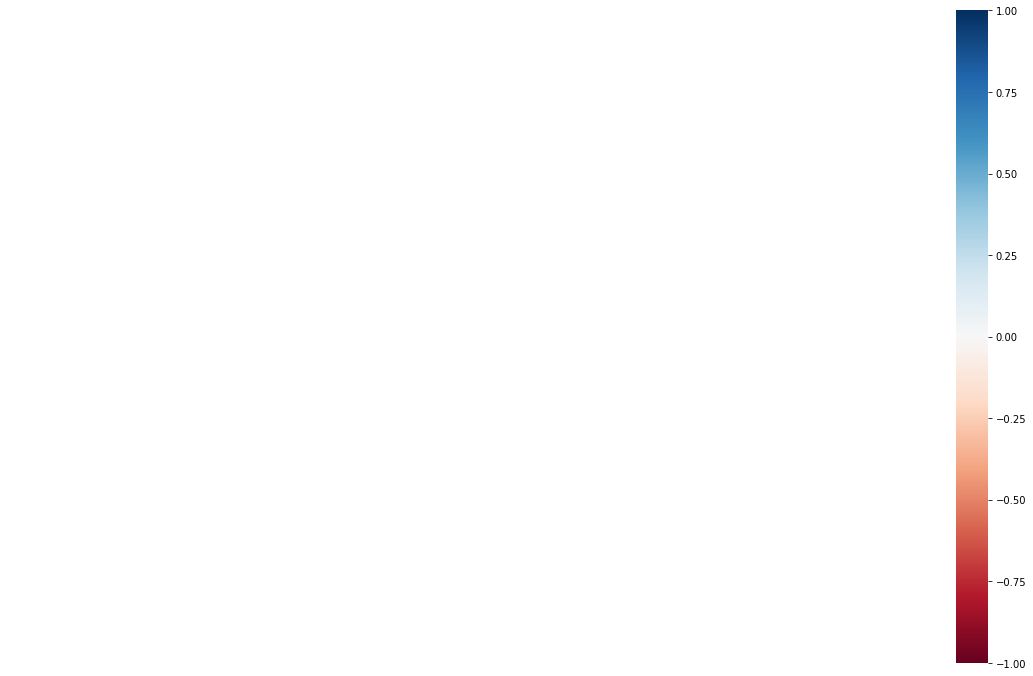

In [90]:
msno.heatmap(X)

In [8]:
df_robusta.isnull().sum()

quality_score                        0
view_certificate_1                  28
view_certificate_2                  28
Cupping Protocol and Descriptors    28
View Green Analysis Details         28
Request a Sample                    28
Species                              0
Owner                                0
Country of Origin                    0
Farm Name                            3
Lot Number                          22
Mill                                 8
ICO Number                          11
Company                              0
Altitude                             3
Region                               2
Producer                             2
Number of Bags                       0
Bag Weight                           0
In-Country Partner                   0
Harvest Year                         0
Grading Date                         0
Owner.1                              0
Variety                             25
Status                               0
Processing Method        